# Bank Marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Importing required libraries

In [1]:
import os
import csv
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings 
warnings.filterwarnings(action='ignore')

# Extracting Data From UCI

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 

In [4]:
# Fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

In [5]:
bank_marketing

{'data': {'ids': None,
  'features':        age           job   marital  education default  balance housing loan  \
  0       58    management   married   tertiary      no     2143     yes   no   
  1       44    technician    single  secondary      no       29     yes   no   
  2       33  entrepreneur   married  secondary      no        2     yes  yes   
  3       47   blue-collar   married        NaN      no     1506     yes   no   
  4       33           NaN    single        NaN      no        1      no   no   
  ...    ...           ...       ...        ...     ...      ...     ...  ...   
  45206   51    technician   married   tertiary      no      825      no   no   
  45207   71       retired  divorced    primary      no     1729      no   no   
  45208   72       retired   married  secondary      no     5715      no   no   
  45209   57   blue-collar   married  secondary      no      668      no   no   
  45210   37  entrepreneur   married  secondary      no     2971      no  

# Check if the file already exists

In [7]:
if os.path.exists('bank_marketing_data.csv'):
    data = bank_marketing['data']['original']
    data.to_csv('bank_marketing_data.csv', index=False, mode='w')
else:
    data = bank_marketing['data']['original']
    data.to_csv('bank_marketing_data.csv', index=False)

# Preliminary Analysis

In [8]:
df = pd.read_csv('bank_marketing_data.csv')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


## Number of independent and dependent variables:

In [25]:
independent_vars = df.columns[:-1]
dependent_var = df.columns[-1]
print("Number of independent variables:", len(independent_vars))
print("Number of dependent variables:", 1)

Number of independent variables: 16
Number of dependent variables: 1


## Number of records:

In [10]:
print("Number of records:", len(df))

Number of records: 45211


In [11]:
df.shape

(45211, 17)

In [56]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['job', 'marital', 'education', 'contact', 'month', 'y']

In [57]:
numerical_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
numerical_features

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

## Data types of variables:

In [12]:
print("Data types of variables:")
print(df.dtypes)

Data types of variables:
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object


## Summary Statistics

In [13]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Data Cleaning

## Checking for Null Values

In [15]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

## Checking for unique values

In [16]:
df.nunique()

age              77
job              11
marital           3
education         3
default           2
balance        7168
housing           2
loan              2
contact           2
day_of_week      31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          3
y                 2
dtype: int64

## All Features

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

## Checking for low variance:

In [18]:
# Checking for columns with a single unique value
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Columns with low variance (possible candidates for removal):", low_variance_cols)

Columns with low variance (possible candidates for removal): []


## Checking & handling for duplicates

In [21]:
if df.duplicated().any():
    print("Duplicates found:", df.duplicated().sum())
    df = df.drop_duplicates()
    print("Duplicates have been removed.")
else:
    print("No duplicates found.")

No duplicates found.


## Handling Missing Values

In [22]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

if not missing_data.empty:
    print("Missing values found in the following columns:")
    print(missing_data)
    # Handling missing values (example using median imputation for numerical columns)
    for column in df.columns:
        if df[column].dtype == np.number:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)  # For categorical data, using mode
    print("Missing values have been handled.")
else:
    print("No missing values found.")

Missing values found in the following columns:
job            288
education     1857
contact      13020
poutcome     36959
dtype: int64
Missing values have been handled.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Unique counts of categories in columns

In [28]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [30]:
for feature in categorical_features:
    print("The feature is {} and the number of categories are {}".format(feature,len(df[feature].unique())))

The feature is job and the number of categories are 11
The feature is marital and the number of categories are 3
The feature is education and the number of categories are 3
The feature is default and the number of categories are 2
The feature is housing and the number of categories are 2
The feature is loan and the number of categories are 2
The feature is contact and the number of categories are 2
The feature is month and the number of categories are 12
The feature is poutcome and the number of categories are 3
The feature is y and the number of categories are 2


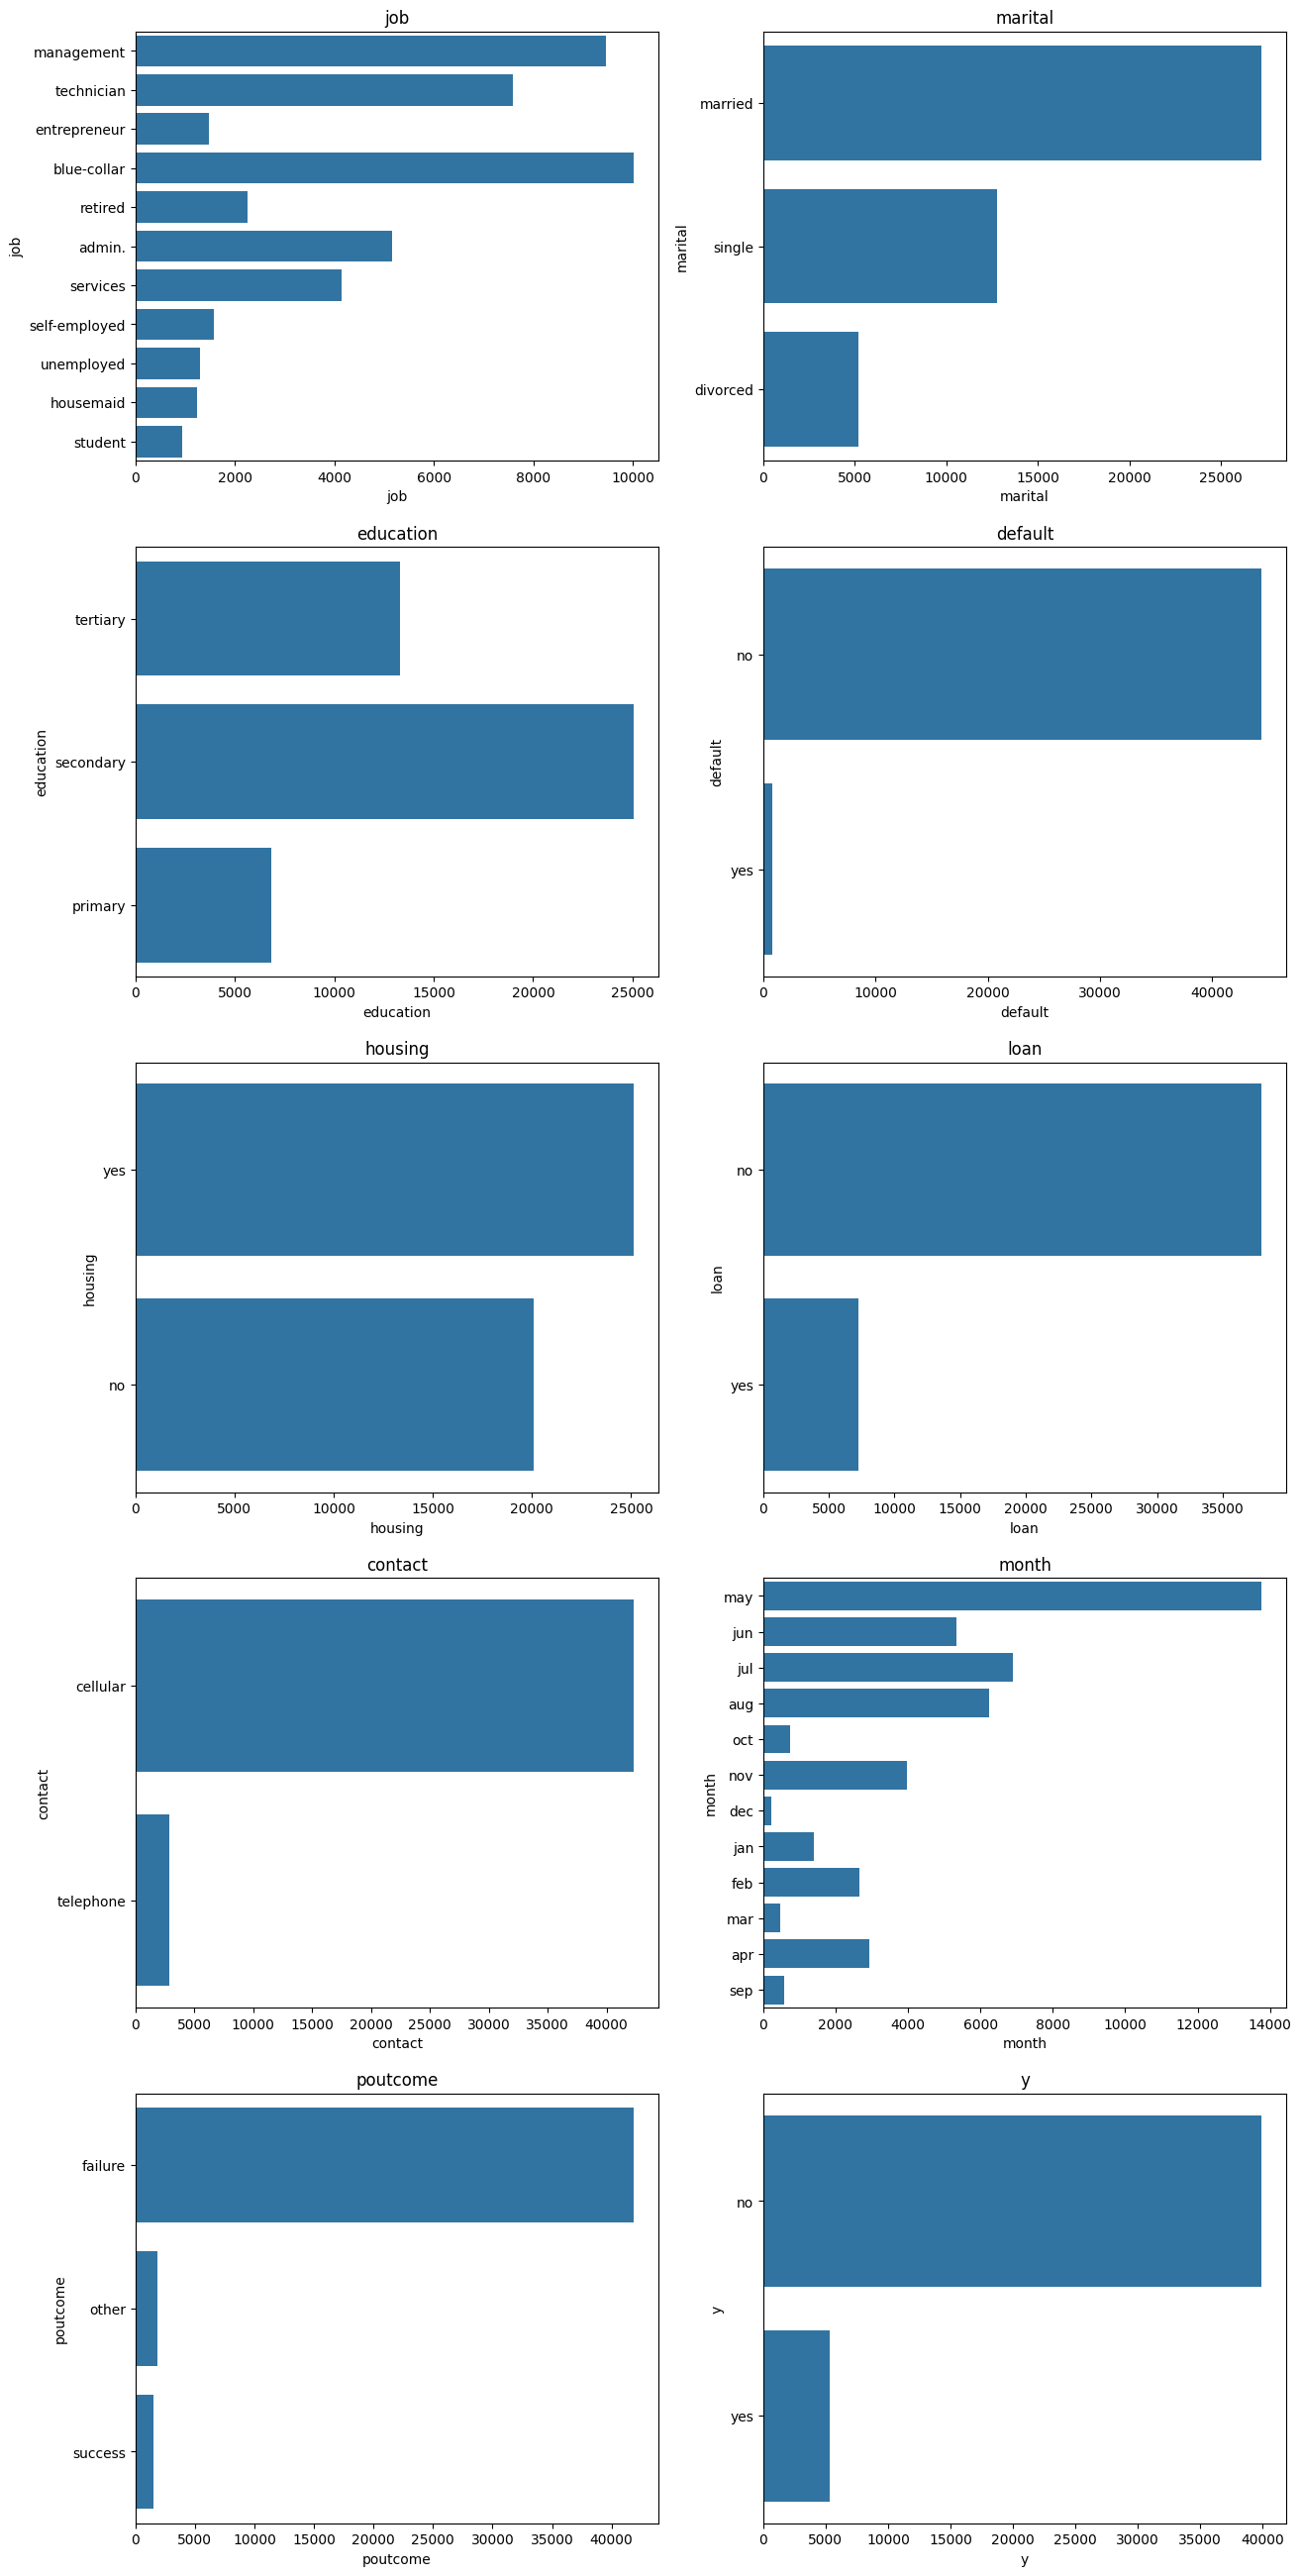

In [32]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

## Relationship between categorical feature and labels

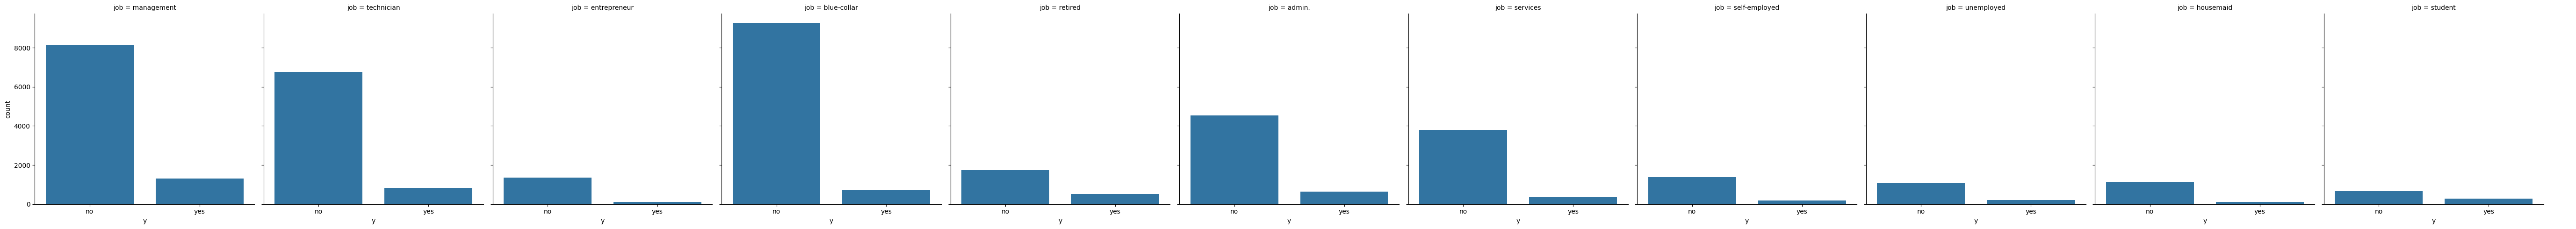

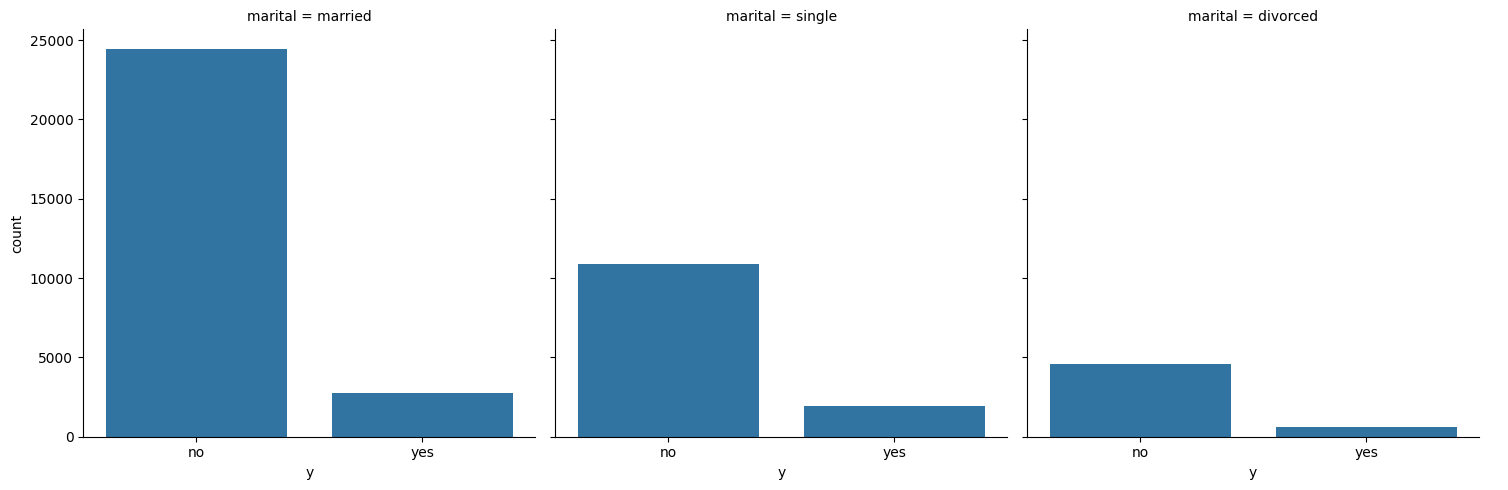

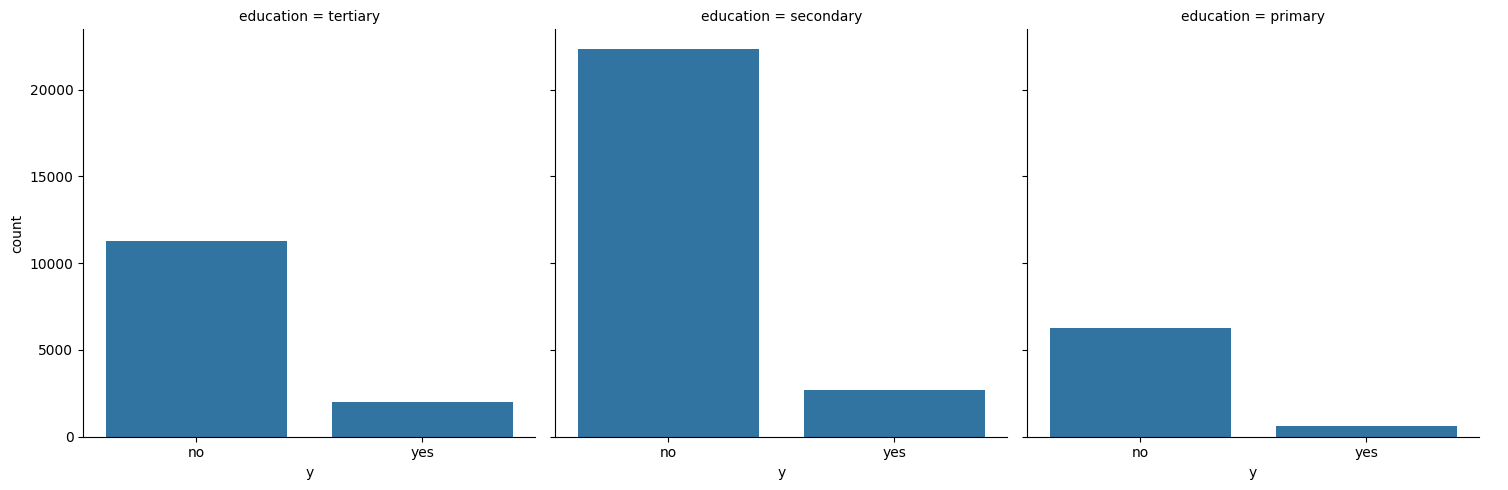

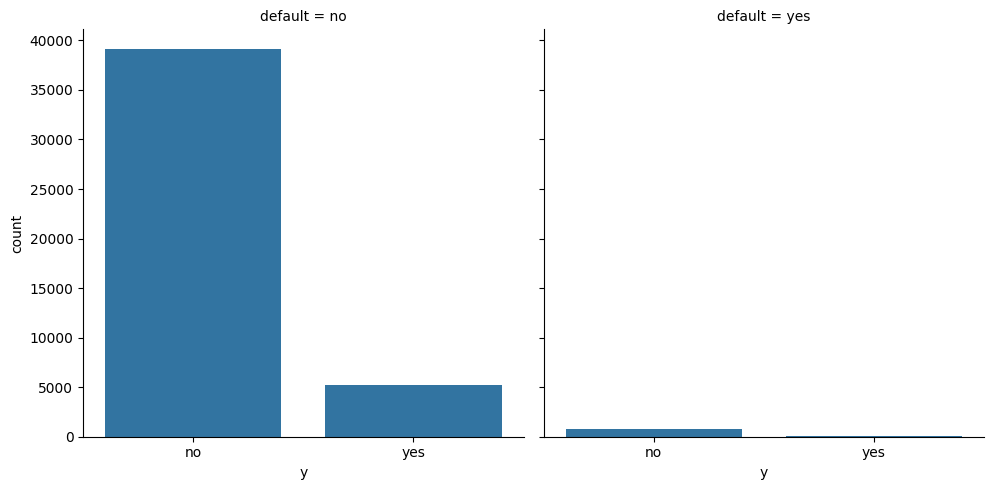

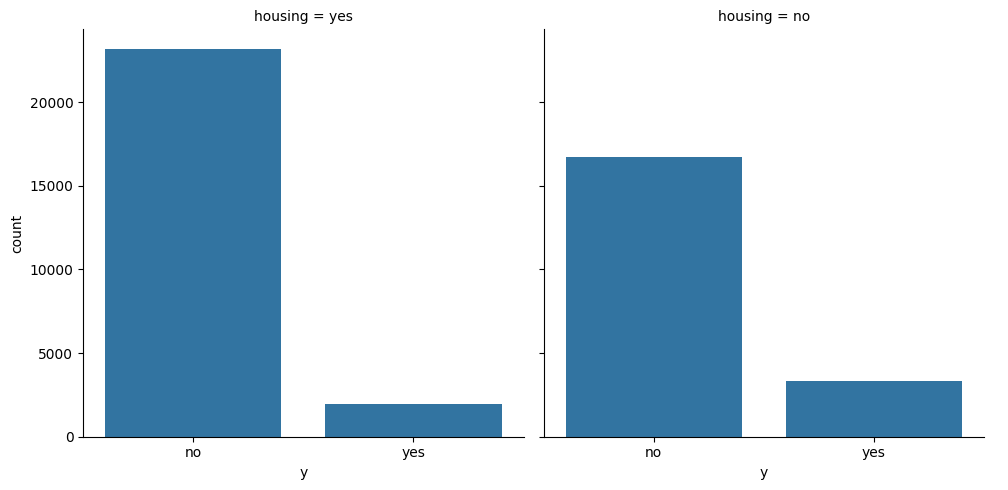

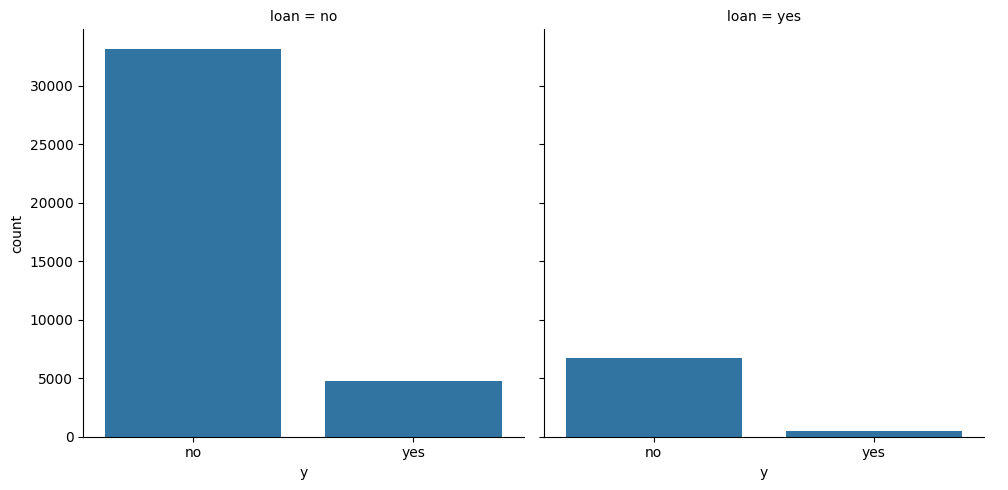

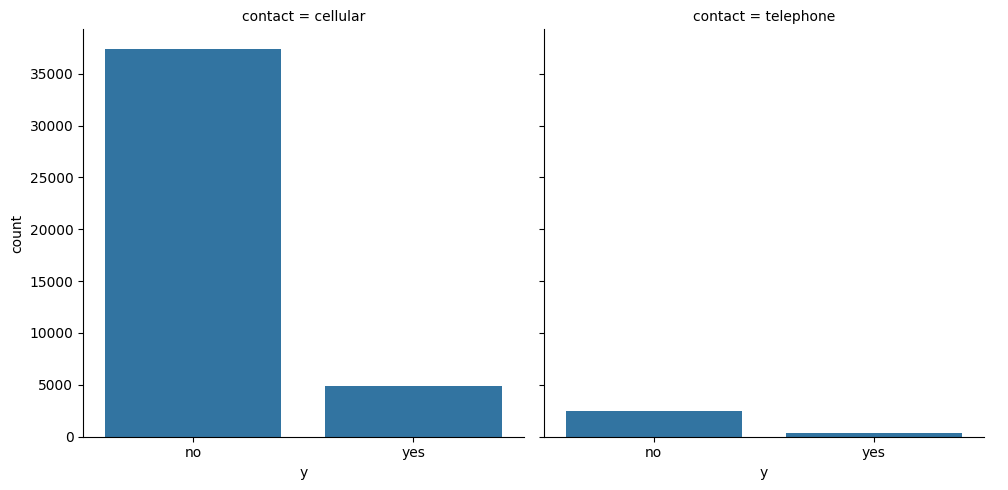

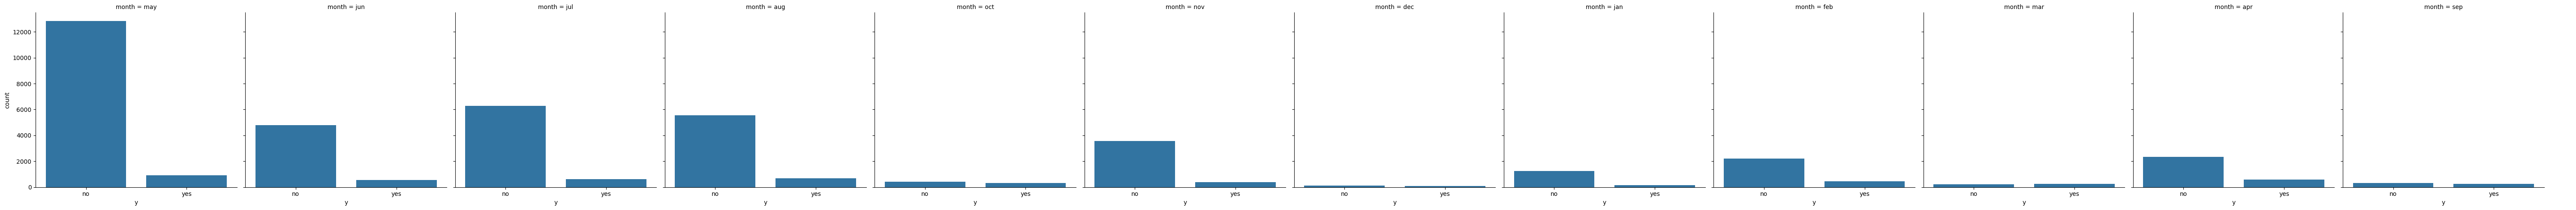

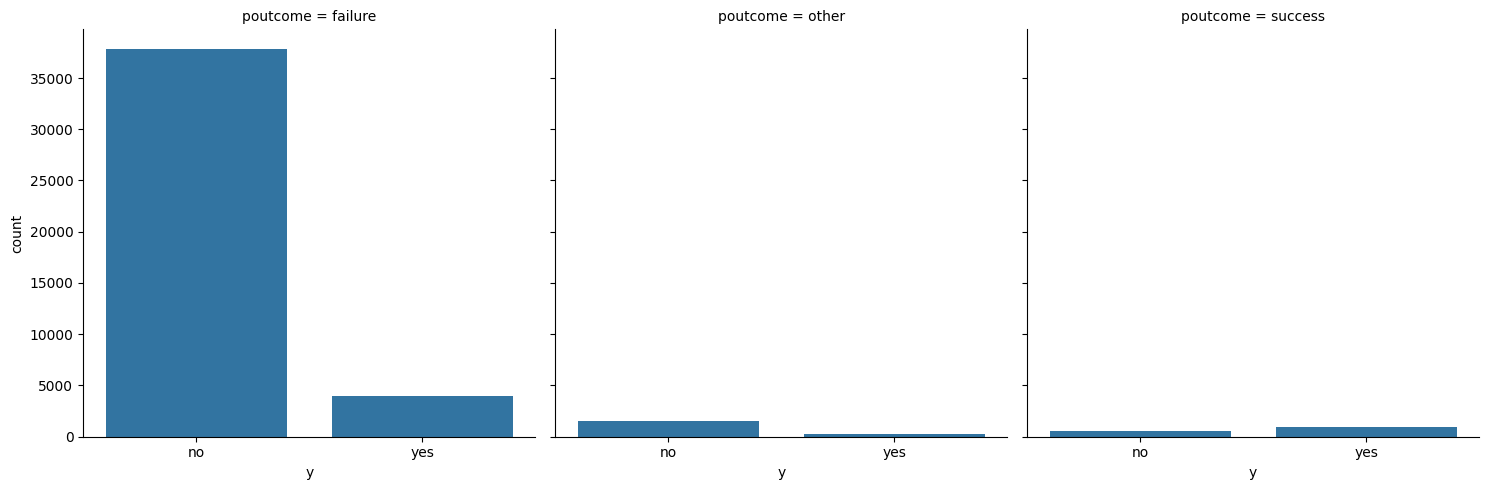

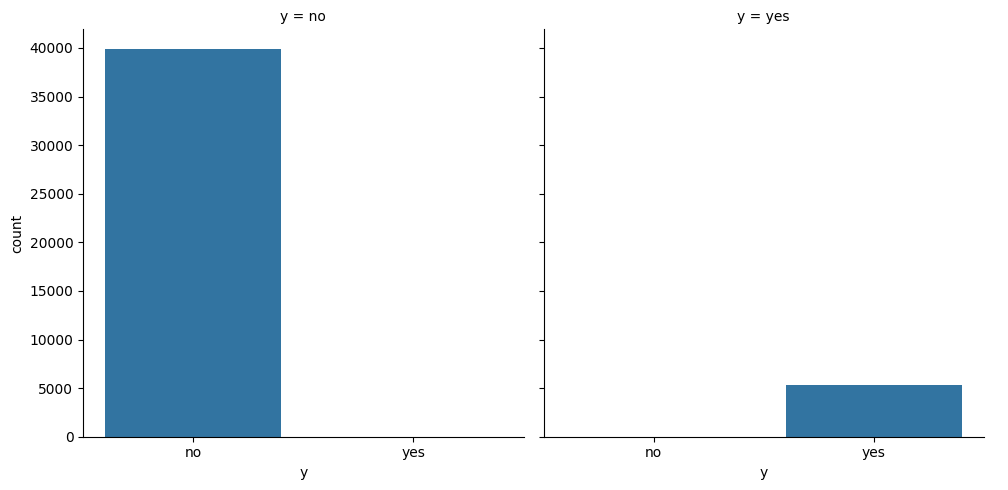

In [33]:
for categorical_feature in categorical_features:
    sns.catplot(x='y',col=categorical_feature,kind='count',data=df)
plt.show()

## Numerical Features

In [36]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print("Number of numerical variable",len(numerical_features))
df[numerical_features].head()

Number of numerical variable 7


,age,balance,day_of_week,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [37]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variables count():{}".format(len(discrete_features)))

Discrete variables count():0


In [38]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature count {}".format(len(continuous_features)))

Continuous feature count 7


## Relation between continuous feature and labels

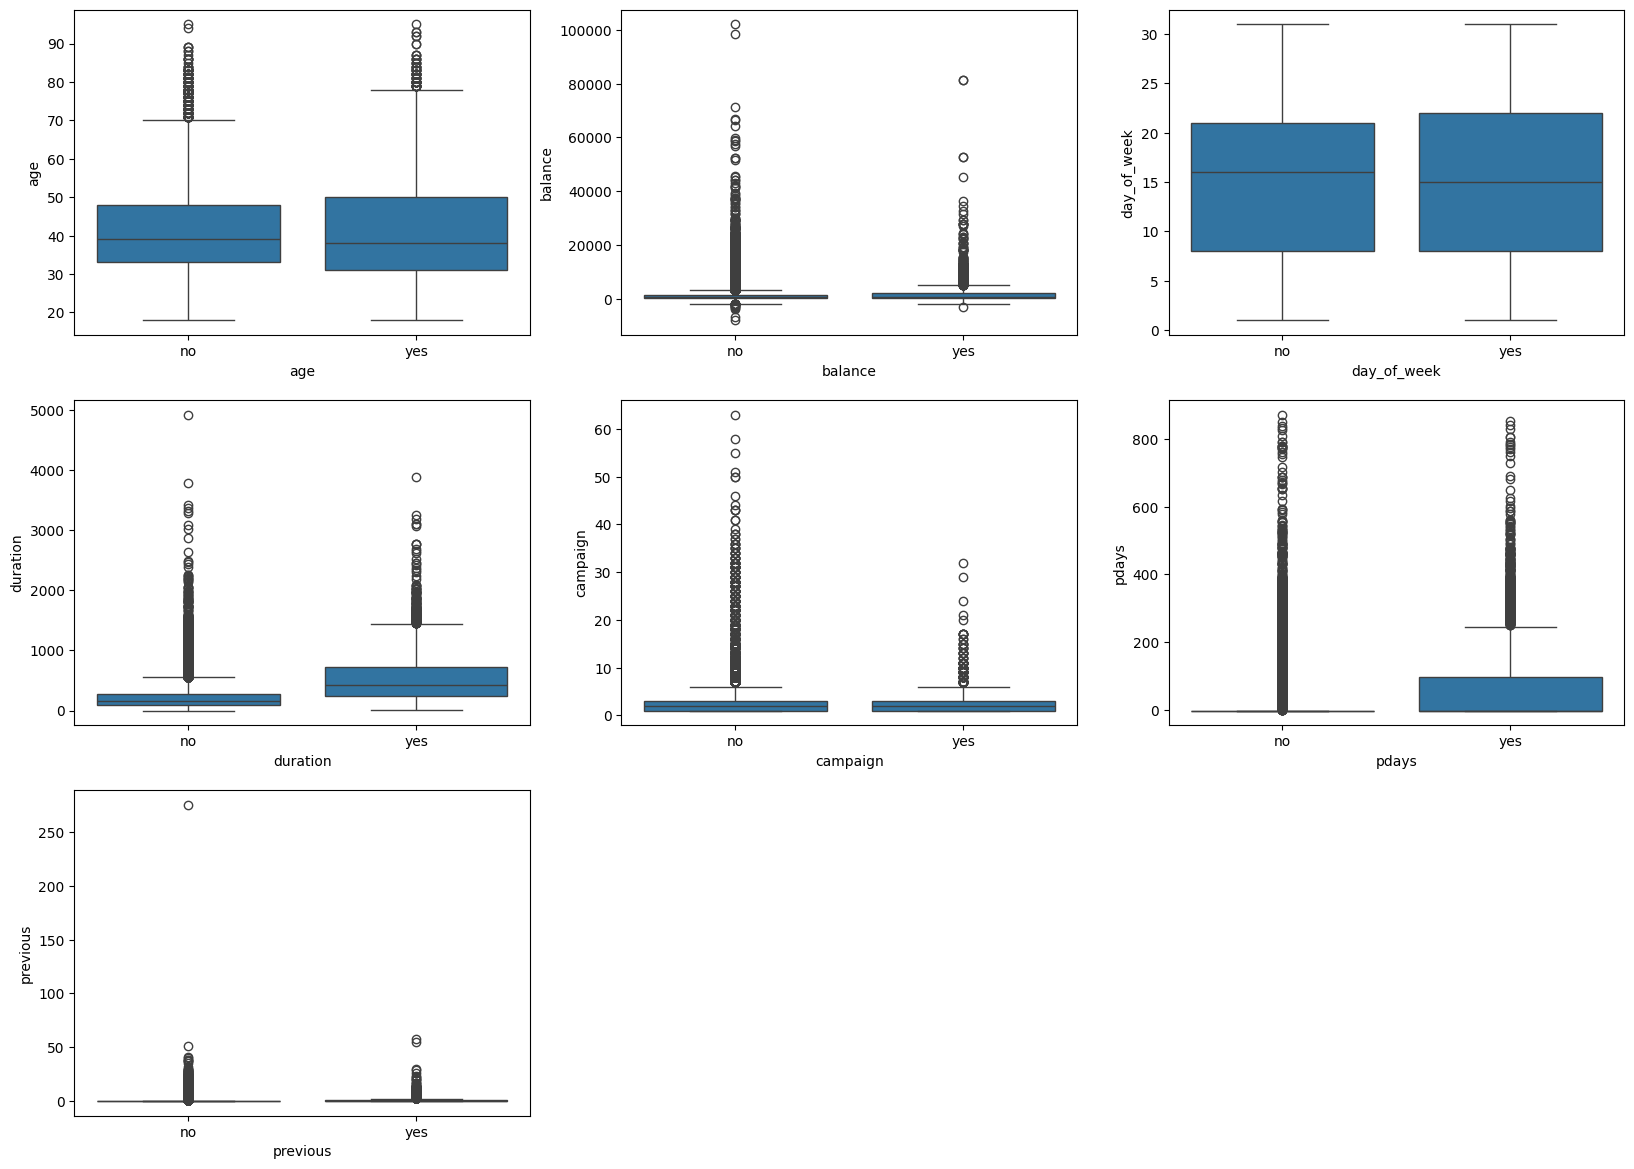

In [39]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y',y=df[feature],data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [42]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [49]:
df['contact'].value_counts()

contact
cellular     42305
telephone     2906
Name: count, dtype: int64

In [50]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [51]:
df['poutcome'].value_counts()

poutcome
failure    41860
other       1840
success     1511
Name: count, dtype: int64

In [43]:
df['job'].value_counts()

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64

In [44]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [45]:
df['education'].value_counts()

education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64

In [46]:
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [47]:
df['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [48]:
df['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

## Label Encoding

In [52]:
df1=df

In [53]:
df1['poutcome'] = df1['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
df1['default'] = df1['default'].map({'yes': -1,'unknown': 0,'no': 1})
df1['housing'] = df1['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df1['loan'] = df1['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [54]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
dataProcessed = pd.get_dummies(df1,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,...,day_of_week_22,day_of_week_23,day_of_week_24,day_of_week_25,day_of_week_26,day_of_week_27,day_of_week_28,day_of_week_29,day_of_week_30,day_of_week_31
0,58,1,2143,-1,1,261,1,-1,0,-1.0,...,False,False,False,False,False,False,False,False,False,False
1,44,1,29,-1,1,151,1,-1,0,-1.0,...,False,False,False,False,False,False,False,False,False,False
2,33,1,2,-1,-1,76,1,-1,0,-1.0,...,False,False,False,False,False,False,False,False,False,False
3,47,1,1506,-1,1,92,1,-1,0,-1.0,...,False,False,False,False,False,False,False,False,False,False
4,33,1,1,1,1,198,1,-1,0,-1.0,...,False,False,False,False,False,False,False,False,False,False


In [55]:
dataProcessed.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'day_of_week_7', 'day_of_week_8', 'day_of_week_9', 'day_of_week_10',
       'day_of_week_11', 'day_of_week_12', 'day_of_week_13', 'day_of_week_14',
       'day_of_week_15', 'day_of_week_16', 'd